# Data Science Blog Post Project

This code is made to analyze open AirBnB datasets using CRISP-DM metodology.

![title](CRISP_DM.png)

This is the link to the Blog Post:
https://medium.com/@dhristov_81112/a-data-science-blog-post-crisp-dm-methodology-use-case-with-airbnb-data-62c79675bb30


CRISP-DM Process (Cross Industry Process for Data Mining)


1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy



<br>
For CRISP-DM reference:

https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining


# Business Understanding

As per CRISP-DM is:
1. What problem we are trying to solve 
2. What questtions we will answer. 

Download Boston and Seattle datasets from www.kaggle.com and take initial look to see how the data is classified. Based on it we will come with relevant questions and prove relations via analysis. I have pciked up four questions. First two are based on statistics, while the third and fourth are use prediction. 

Datasets used:

**Boston, MA, USA Airbnb Open Data** - listing activity of homestays in Boston, MA. You can find the datasets used from the following link:  https://www.kaggle.com/airbnb/boston

**Seattle, WA, USA  Airbnb Open Data** - listing activity of homestays in Seattle, WA. You can find the datasets used from the following link: https://www.kaggle.com/airbnb/seattle/

**<font color='blue'>Question 1: </font>How much are the AirBnB Listed properties prices compared in Seattle vs Boston**

**<font color='blue'>Question 2: </font>How does the availability to AirBnb rental change during the week and per months of the year**

**<font color='blue'>Question 3: </font>Create model for rental price prediction affected by reviews**

**<font color='blue'>Question 4: </font>Create model for rental price prediction affected by how many beds are into the property**


### 2. Data Understanding

The main business for AirBnB is to link homeowners and renters. The  business model is clearly defined and data is already precollected for us. The

Information about the datasets:
 - Calendar (calendar.csv) -  includes listing id (key field) and the price and availability for that day
 - Listings (listings.csv) - includes full descriptions and average review score
 - Reviews (reviews.csv) - includes unique id for each reviewer and detailed comments

#### First we will import the necessary libraries. Always put this on the top of your code/file. 

For more information:
https://docs.python.org/3/faq/programming.html#what-are-the-best-practices-for-using-import-in-a-module 

In [261]:
#Import the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [262]:
#Loading Boston AirBnB Open Dataset
df_boston_cal = pd.read_csv('./boston/calendar.csv')
df_boston_list = pd.read_csv('./boston/listings.csv')
df_boston_rev = pd.read_csv('./boston/reviews.csv')

In [263]:
#Loading Seattle AirBnB Open Dataset
df_seattle_cal = pd.read_csv('./seattle/calendar.csv')
df_seattle_list = pd.read_csv('./seattle/listings.csv')
df_seattle_rev = pd.read_csv('./seattle/reviews.csv')

Lets use Pandas head() function to virify first 5 rows for the object based on position. It will help for quickly testing and if we have the right type of data.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.head.html

In [264]:
#Read Boston data to see columns and data in rows - calendar.csv
df_boston_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [265]:
#Read Seattle data to see columns and data in rows - calendar.csv
df_seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


**<font color='blue'> Analysis for Question 1: </font>How much are the AirBnB Listed properties prices compared in Seattle vs Boston**


In [266]:
# I will use matplotlib to draw the price per day in Boston and Seattle. 
# That require the dataset format to be change from string to integer/float to be able to plot.
# Function "clean_astype_date" converts 'date' to datetime64 type and 'price' to float64

def clean_astype_date(df, price_per_day):
    '''
    INPUT 
        df - dataset need to be changed 
        price_per_day - the name of the new dataset including price per day
        
    OUTPUT
        df - new dataset with changed date/price
        price_per_day - the new dataset including price per day
    '''
    
    df["date"] = df["date"].astype("datetime64")
    df = df[df.columns[1:]].replace('[\$,]', '', regex=True)
    df['price'] = df['price'].astype('float64')
    
    df['day'] = df['date'].map(lambda x: x.timetuple().tm_yday)
    
    # Average price per day of the year
    price_per_day = df.groupby('day').mean()
    
    return df,price_per_day

In [267]:
price_per_day_boston = pd.DataFrame()
df_boston_cal, price_per_day_boston = clean_astype_date(df_boston_cal, price_per_day_boston)

price_per_day_seattle = pd.DataFrame()
df_seattle_cal, price_per_day_seattle = clean_astype_date(df_seattle_cal, price_per_day_seattle)

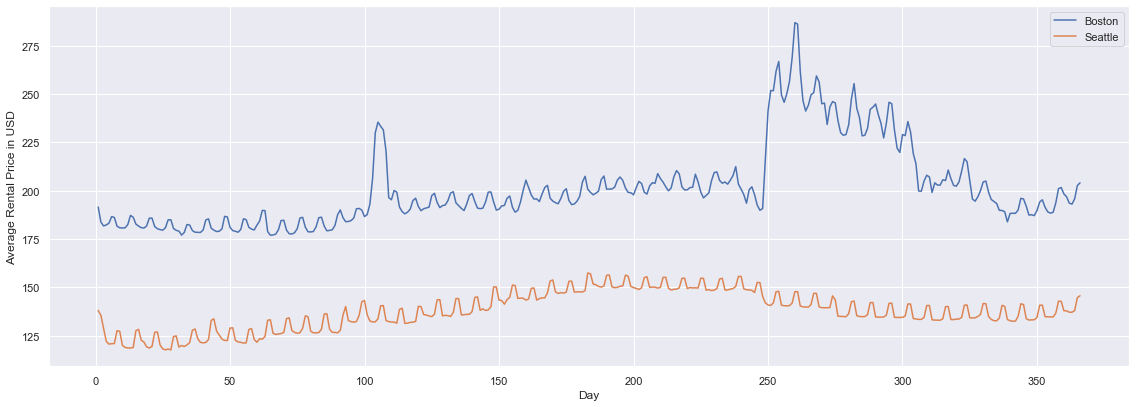

In [268]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(price_per_day_boston['price'], label='Boston')
ax.plot(price_per_day_seattle['price'], label='Seattle')
ax.legend()
ax.set_xlabel('Day')
ax.set_ylabel('Average Rental Price in USD');

## From the analysis so far we see that Boston the AirBnB rentals are more expensive than Seattle

**<font color='blue'>Analysis for Question 2: </font>How does the availability to AirBnb rental change during the week and per months of the year**

In [269]:
# Boston - availability per day
available_per_day_boston = pd.get_dummies(df_boston_cal, columns = ['available'])
available_per_day_boston = available_per_day_boston.drop(['available_f'],axis=1).groupby('day').mean()

# Seattle - availability per day
available_per_day_seattle = pd.get_dummies(df_seattle_cal, columns = ['available'])
available_per_day_seattle = available_per_day_seattle.drop(['available_f'],axis=1).groupby('day').mean()

# the above should be a function due to the repetitive code

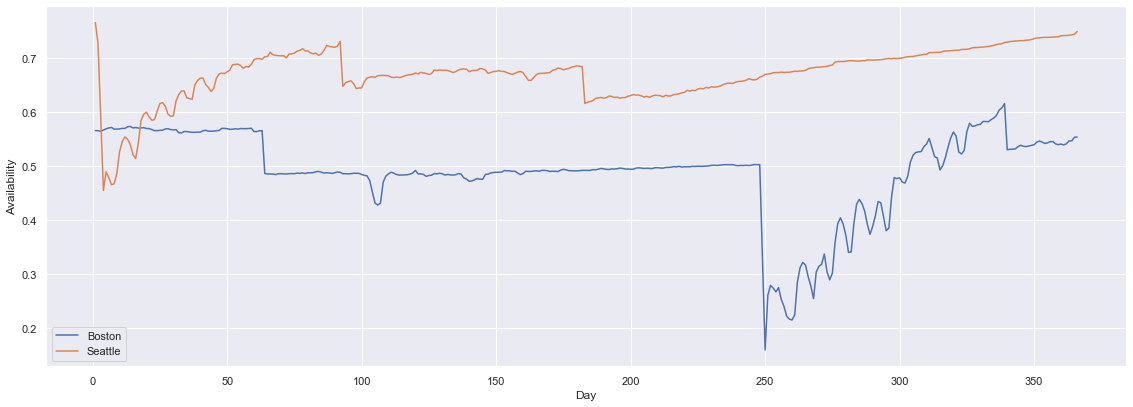

In [270]:
#Visualisation for how availability is changing based on day of the year

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(available_per_day_boston['available_t'], label='Boston')
ax.plot(available_per_day_seattle['available_t'], label='Seattle')
ax.legend()
ax.set_xlabel('Day')
ax.set_ylabel('Availability');

In [271]:
# Calculate the Availability in format "f" - False or "Not available" and "t" - True or "Avaiable" for Boston
df_boston_cal['available'].value_counts()/df_boston_cal.shape[0]

f    0.508716
t    0.491284
Name: available, dtype: float64

In [272]:
# Calculate the Availability in format "f" - False or "Not available" and "t" - True or "Avaiable" for Seattle
df_seattle_cal['available'].value_counts()/df_seattle_cal.shape[0]

t    0.67061
f    0.32939
Name: available, dtype: float64

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x144aa9dd8>)

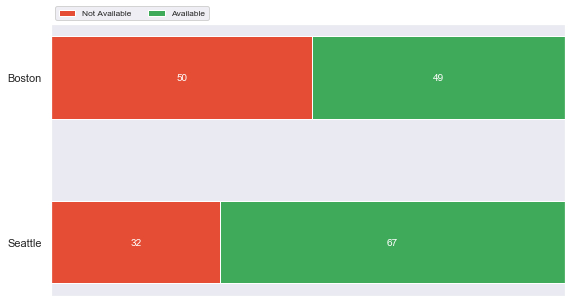

In [273]:
# Calculate the available/not available units in percents per city
boston_f = (df_boston_cal[df_boston_cal['available']=='f'].count()['available']/df_boston_cal.shape[0])*100
boston_t = (df_boston_cal[df_boston_cal['available']=='t'].count()['available']/df_boston_cal.shape[0])*100
seattle_f = (df_seattle_cal[df_seattle_cal['available']=='f'].count()['available']/df_seattle_cal.shape[0])*100
seattle_t = (df_seattle_cal[df_seattle_cal['available']=='t'].count()['available']/df_seattle_cal.shape[0])*100

# Draw a plot which includes the combined values
category_names = ['Not Available', 'Available']

results = {
    'Boston': [boston_f, boston_t],
    'Seattle': [seattle_f, seattle_t]
}


def city_available(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


city_available(results, category_names)

**From the analysis so far we clearly see that Boston is less available destination than Seattle.
There are no significant peaks in Seattle. It can be hard to find rental during Boston marathon weekend and especially September when students are back to school. The missing values might affect our analysis especially if they  are related to a specific group or price range but I do not think this is the case in the datasets we I am using.**

**<font color='blue'>Analysis for Question 3: </font>Create model for rental price prediction affected by reviews**

In [274]:
#Boston data verification - listings.csv
df_boston_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [275]:
#Seattle data verification - listings.csv
df_seattle_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### From the output above we see that in the Listings datasets for Boston and Seattle there are  differences in the columns. Let's find out what are the differences.

In [277]:
#Obtain all the column names in Boston Listings dataset
list_boston_columns = list(df_boston_list.columns.values)
len(list_boston_columns)

95

In [278]:
#Obtain all the column names in Seattle Listings dataset
list_seattle_columns = list(df_seattle_list.columns.values)
len(list_seattle_columns)

92

In [279]:
#Find the diffence between the columns
col_diff = []
if len(list_seattle_columns) > len(list_boston_columns):
   col_diff = [i for i in list_seattle_columns if i not in list_boston_columns]
else:
   col_diff = [i for i in list_boston_columns if i not in list_seattle_columns]
 
print("Here are the columns missing from Seattle listings dataset: \n", col_diff) 

Here are the columns missing from Seattle listings dataset: 
 ['access', 'interaction', 'house_rules']


### Difference into the columns will not affect our analysis as we will not compare the missing columns ##

In [280]:
df_boston_list[['price','weekly_price', 'monthly_price','cleaning_fee','review_scores_rating','number_of_reviews']]

,price,weekly_price,monthly_price,cleaning_fee,review_scores_rating,number_of_reviews
0,$250.00,NaN,NaN,$35.00,NaN,0
1,$65.00,$400.00,NaN,$10.00,94.0,36
2,$65.00,$395.00,"$1,350.00",NaN,98.0,41
3,$75.00,NaN,NaN,$50.00,100.0,1
4,$79.00,NaN,NaN,$15.00,99.0,29
5,$75.00,NaN,NaN,$30.00,100.0,8
6,$100.00,NaN,NaN,NaN,90.0,57
7,$75.00,NaN,NaN,$10.00,96.0,67
8,$58.00,NaN,NaN,NaN,96.0,65
9,$229.00,NaN,NaN,$50.00,94.0,33


In [281]:
df_seattle_list[['price','weekly_price', 'monthly_price','cleaning_fee','review_scores_rating','number_of_reviews']]

,price,weekly_price,monthly_price,cleaning_fee,review_scores_rating,number_of_reviews
0,$85.00,NaN,NaN,NaN,95.0,207
1,$150.00,"$1,000.00","$3,000.00",$40.00,96.0,43
2,$975.00,NaN,NaN,$300.00,97.0,20
3,$100.00,$650.00,"$2,300.00",NaN,NaN,0
4,$450.00,NaN,NaN,$125.00,92.0,38
5,$120.00,$800.00,NaN,$40.00,95.0,17
6,$80.00,$575.00,NaN,NaN,99.0,58
7,$60.00,$360.00,NaN,$25.00,97.0,173
8,$90.00,$500.00,"$1,700.00",NaN,97.0,8
9,$150.00,"$1,000.00","$3,000.00",$40.00,97.0,32


**We have already the data listed the columns which will be used. We still need to clean up the data in sach a way that we can get the answer for Question 3 and 4.**

**We need to ensure that columns has at least 80% value of data to be able to proplery predict with our model** 


In [282]:
#First we will convert 'price', 'weekly_price', 'monthly_price' to numerical and will try to predict how price is affected by the review scores

#Boston remove $ sign
df_boston_list_prices = df_boston_list[df_boston_list.columns[1:]].replace('[\$,]', '', regex=True)
#Seattle  remove $ sign
df_seattle_list_prices = df_seattle_list[df_seattle_list.columns[1:]].replace('[\$,]', '', regex=True)

# convert to float
df_boston_list_prices['price'] = df_boston_list_prices['price'].astype('float64')
df_seattle_list_prices['price'] = df_seattle_list_prices['price'].astype('float64')
df_boston_list_prices['weekly_price'] = df_boston_list_prices['weekly_price'].astype('float64')
df_seattle_list_prices['weekly_price'] = df_seattle_list_prices['weekly_price'].astype('float64')
df_boston_list_prices['monthly_price'] = df_boston_list_prices['monthly_price'].astype('float64')
df_seattle_list_prices['monthly_price'] = df_seattle_list_prices['monthly_price'].astype('float64')

list_df = [df_boston_list_prices, df_seattle_list_prices]

In [283]:
# we can answer more questions also from a quick look below for both cities
# like where properties are bigger based (more bathrooms/bedrooms for example)
# also avaalability - Boston looks like less available for renting

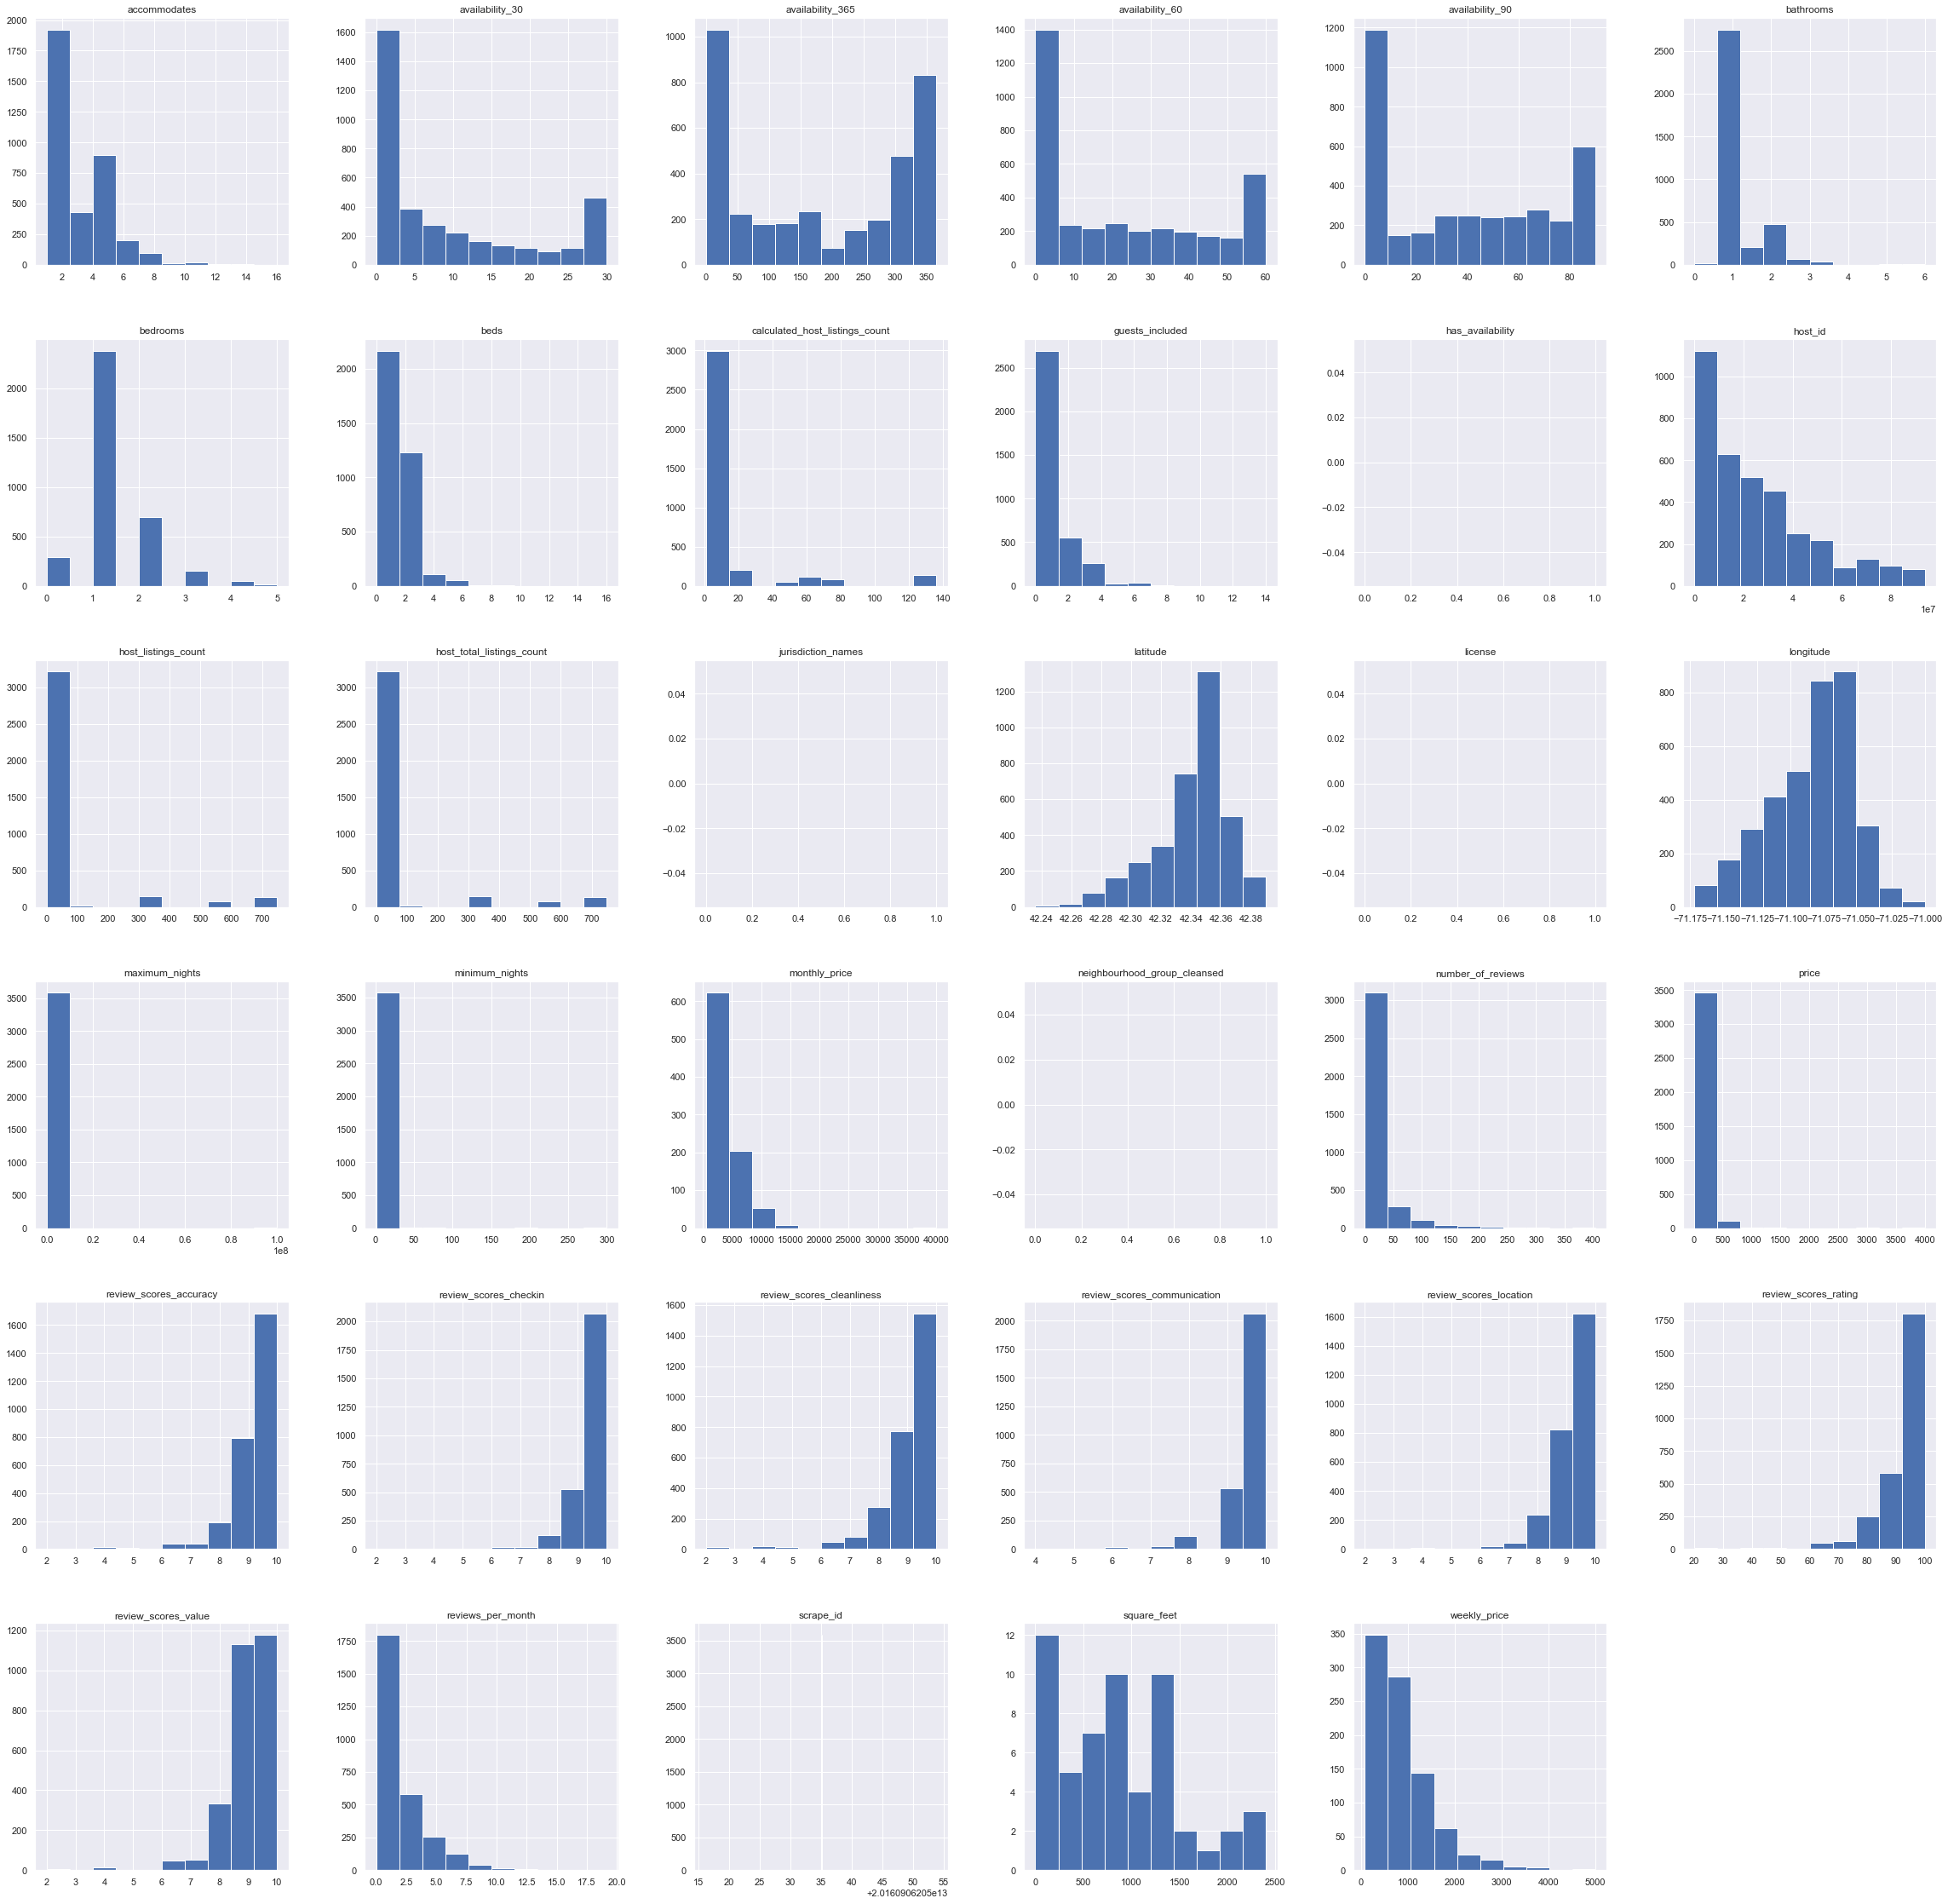

In [284]:
# Look for Boston

plt.rcParams["figure.figsize"] = (40,40);
df_boston_list_prices.hist();

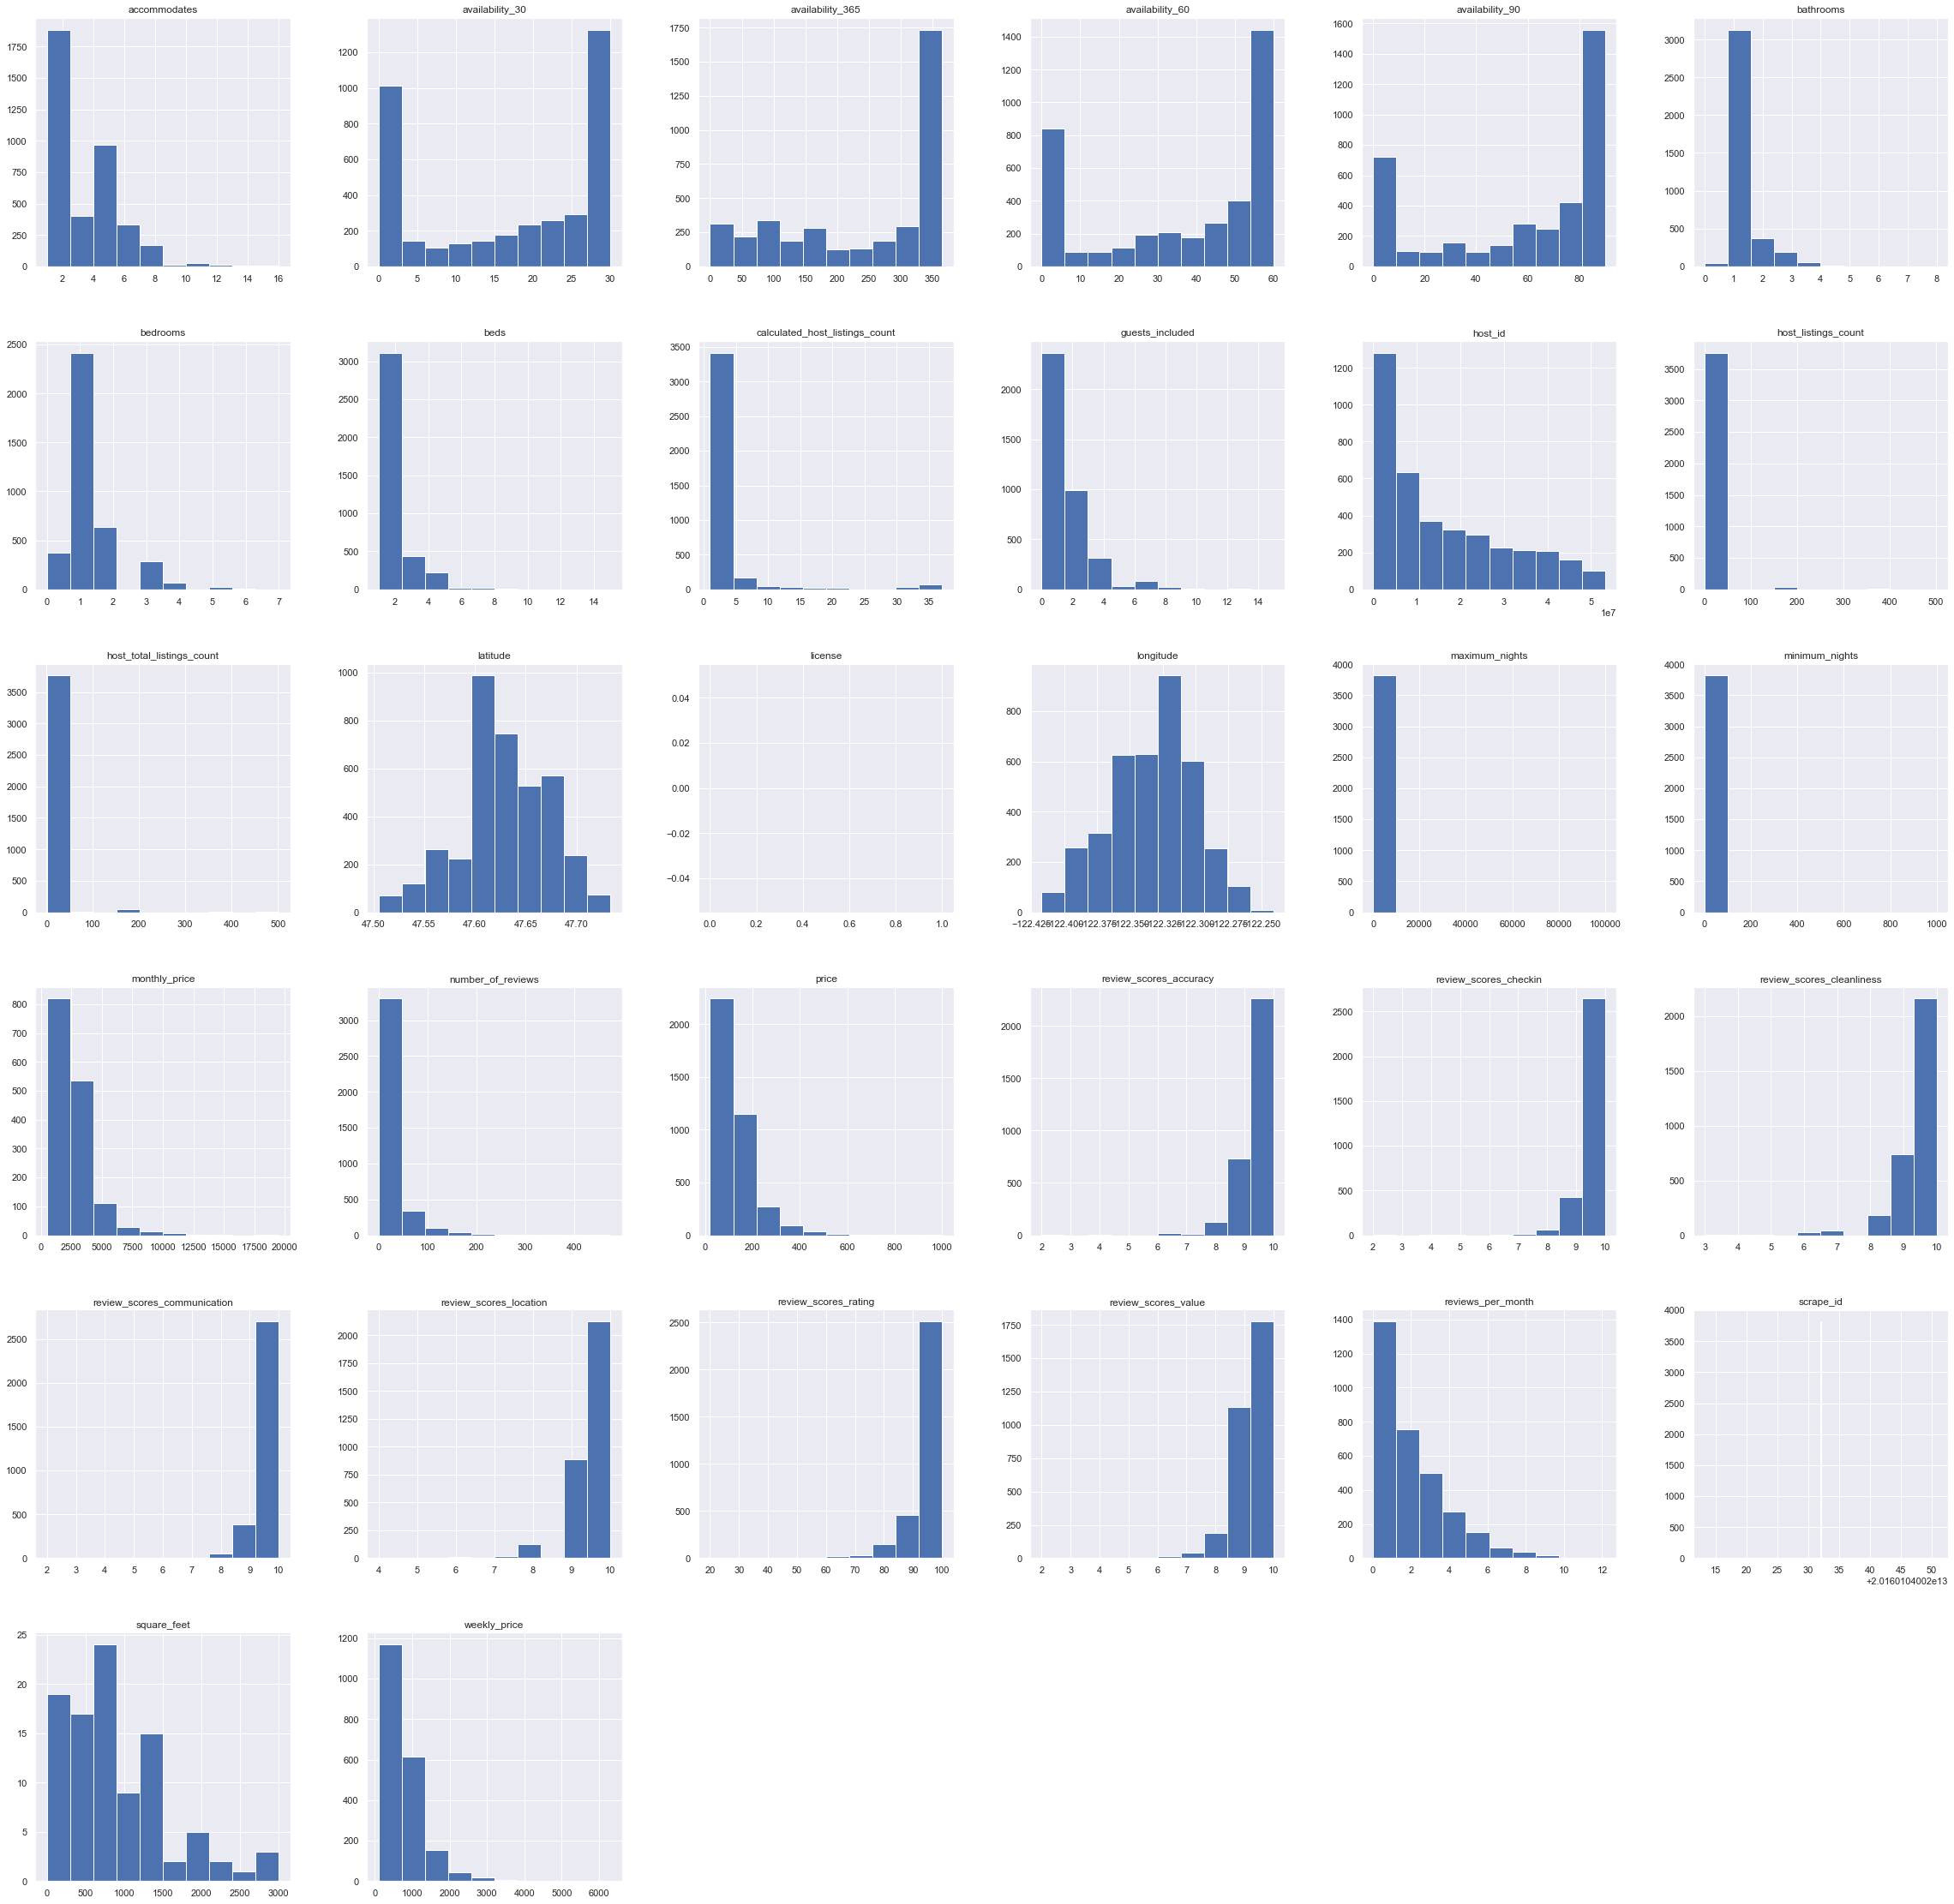

In [285]:
# Look for Seattle

plt.rcParams["figure.figsize"] = (40,40);
df_seattle_list_prices.hist();

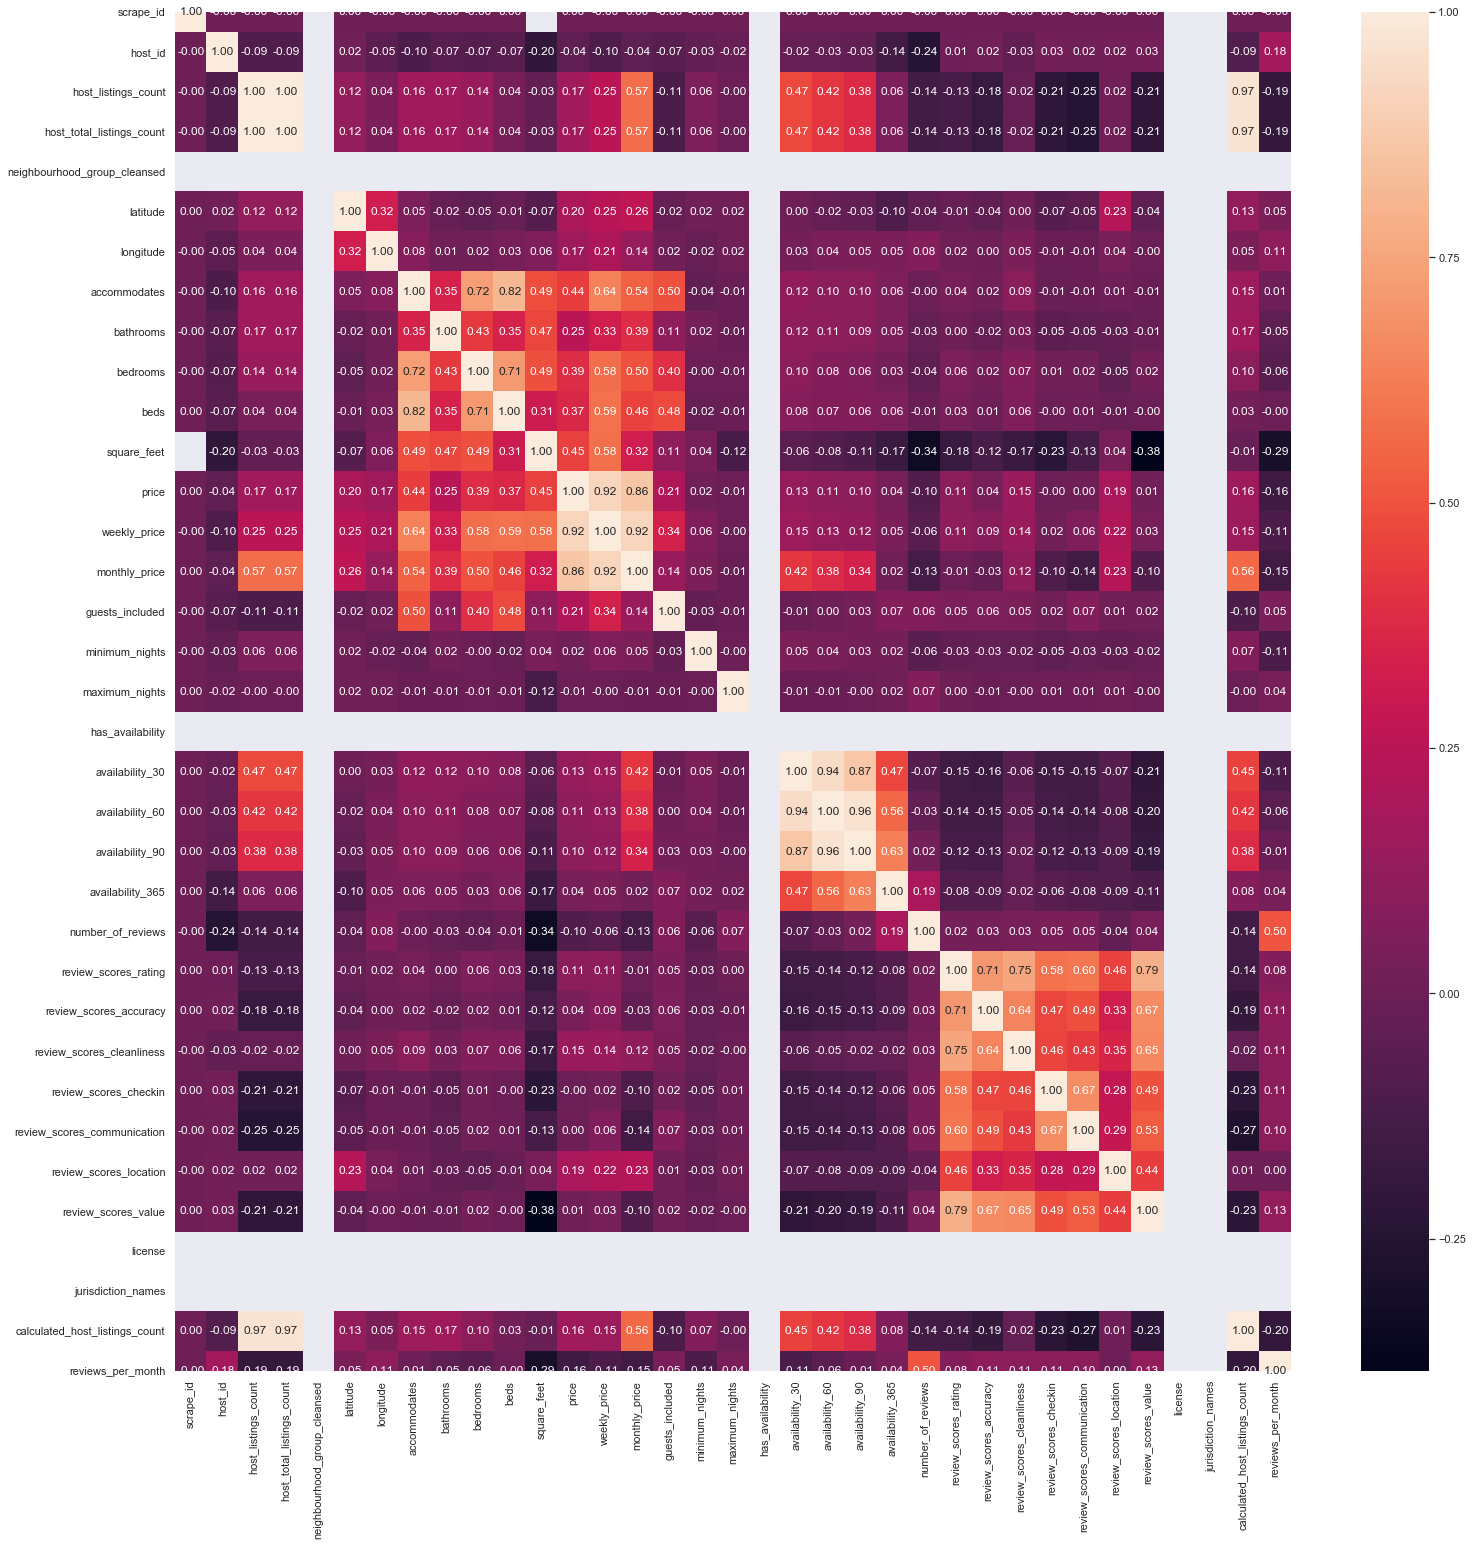

In [286]:
# Generate Heat Map for Boston
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df_boston_list_prices.corr(), annot=True, fmt=".2f");

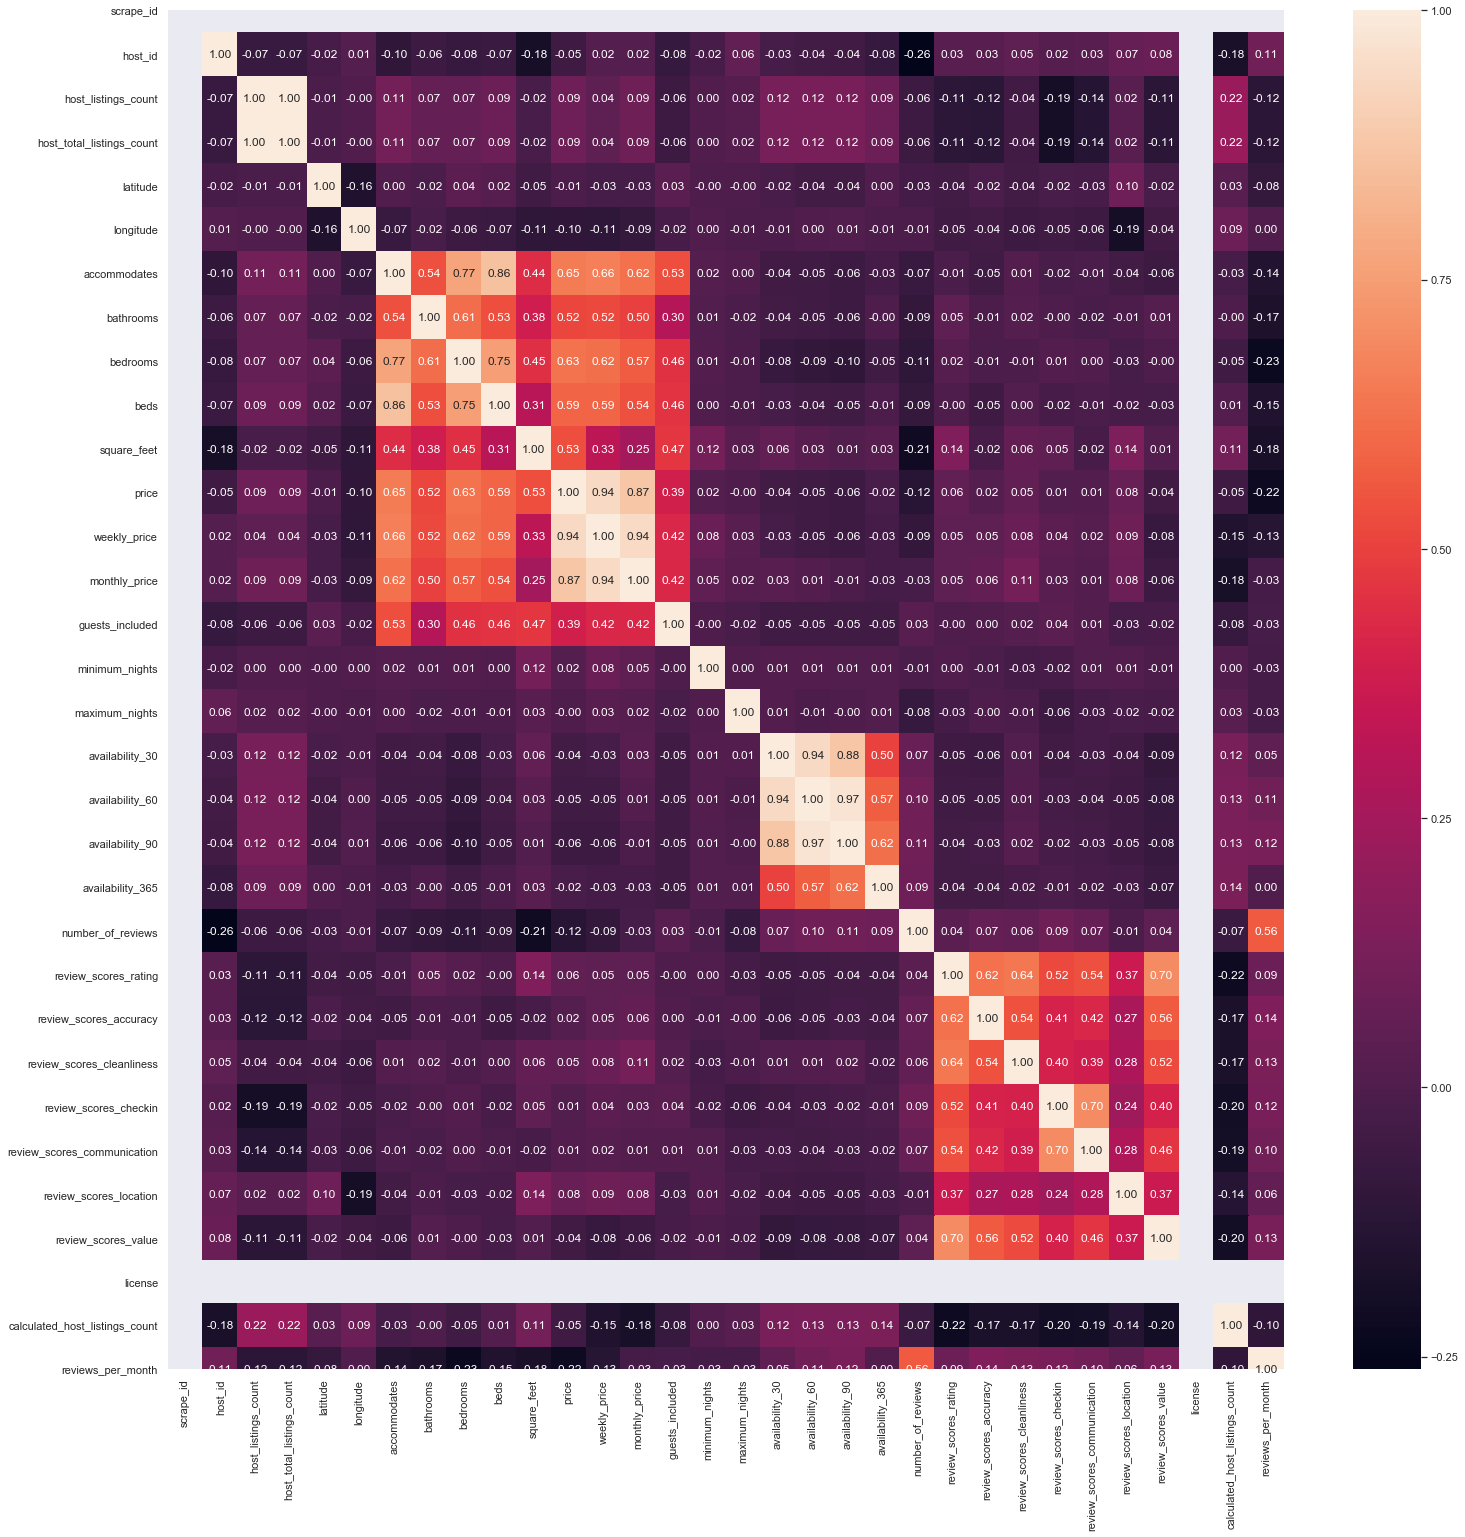

In [287]:
# Generate Heat Map for Seattle
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df_seattle_list_prices.corr(), annot=True, fmt=".2f");

In [288]:
#Boston: Set of columns with more than 80% of NaN

top_miss_val_boston = set(df_boston_list_prices.columns[df_boston_list_prices.isnull().mean() > 0.80])
top_miss_val_boston

{'has_availability',
 'jurisdiction_names',
 'license',
 'neighbourhood_group_cleansed',
 'square_feet'}

In [289]:
#Seattle: Set of columns with more than 80% of NaN

top_miss_val_seattle = set(df_seattle_list_prices.columns[df_seattle_list_prices.isnull().mean() > 0.80])
top_miss_val_seattle

{'license', 'square_feet'}

### Based on the missing % values per column in each dataset we can see that the columns that we will use are not affected.

In [291]:
# We will use 
# Only use numerical variables 
# Use mean for imputing 
def clean_data(df_model,X_list):
    
    '''
    INPUT 
        df_model - cleaned up dataset in terms of formating for the numbers
        X_list provide the X columns for the prediction model
       
        
    OUTPUT
        returns the cleaned data filled with mean
    '''
    
    X = df_model[X_list]
    X = X.groupby(X.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
    
    return X

def predict_model(ds_name,df_model,X):
    
    '''
    INPUT 
        ds_name - dataset name that will be used to print the result
        df_model - cleaned up dataset in terms of formating for the numbers
        price column is hardcoded as we will compare the price
        test_size and random state are selected as per the better fit for the model.
        
        
    OUTPUT
        prints the r-squared score as result of the prediction between price and the given at the input columns
        if the r-squared result is higher value the prediction is better. r-squared result is into range from 0 to 1.
        
    '''
    

    y = df_model['price']

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, random_state=40) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 
    print("The r-squared score for your model for {} was {} on {} values.".format(ds_name,r2_score(y_test, y_test_preds), len(y_test)))


In [292]:
# Prediction for Boston price
# Only numerical variables are used and droping any rows with missing values below
# I have reduced the columns to 2 to keep the model accurate and simple

X = clean_data(df_boston_list_prices,['review_scores_rating','number_of_reviews'])

predict_model('Boston',df_boston_list_prices,X)

The r-squared score for your model for Boston was 0.014608186476697926 on 1434 values.


In [254]:
# Prediction for Seattle price
# Only numerical variables are used and droping any rows with missing values below
# I have reduced the columns to 2 to keep the model accurate and simple

X = clean_data(df_seattle_list_prices,['review_scores_rating','number_of_reviews'])

predict_model('Seattle',df_seattle_list_prices,X)

The r-squared score for your model for Seattle was 0.01880744519248312 on 1528 values.


**<font color='blue'>Analysis for Question 4: </font>Create model for rental price prediction affected by how many beds are into the property**

In [251]:
# Prediction for Boston price
# Only numerical variables are used and droping any rows with missing values below
# I have reduced the columns to 4 to keep the model accurate and simple
 
X = clean_data(df_seattle_list_prices,['bedrooms', 'beds','accommodates','longitude'])

predict_model('Boston', df_boston_list_prices,X)

The r-squared score for your model for Boston was 0.19780448427978714 on 1434 values.


In [293]:
# Prediction for Seattle price
# Only numerical variables are used and droping any rows with missing values below
# I have reduced the columns to 4 to keep the model accurate and simple

X = clean_data(df_seattle_list_prices,['bedrooms', 'beds','accommodates','longitude'])

predict_model('Seattle',df_seattle_list_prices,X)

The r-squared score for your model for Seattle was 0.4948230646258349 on 1528 values.


### Conclusion

Using CRISP-DM Process I was able to answer and visualize different questions and during this analysis you can come with many more questions and answers very easily . Missing values and the categorical columns introduce complications. I decided to use only numerical columns based on the question 3 we had answer and Impute the rest columns with the mean (I did try also with Median and get same results). For imputing I used pandas. 


Question 3: Create model for rental price prediction affected by reviews

**Question1:** How much are the AirBnB Listed properties prices compared in Seattle vs Boston? - Boston has higher prices than Seattle for a vacation

**Question2:** How the availability to AirBnb rental changes during the week and per months of the year? - There are no significant peaks in Seattle. It can be hard to find rental during September which might be matchig with Boston marathon weekend and especially September when students are back to school. 

**Question3:** Create model for rental price prediction affected by reviews - I created a prediction model using listings.csv dataset for Boston and Seattle. I used mainly the numerical columns as they provided a good information for Boston and Seattle. The prediction showed that the rental prices are not affected by the overall review scores. Same results are seen on history plots.

**Question4:** Create model for rental price prediction affected by how many beds are into the property - I created a prediction model using listings.csv dataset for Boston and Seattle. I used mainly the numerical columns as they provided a good information for Boston and Seattle. The prediction showed that the rental prices are affected by the number of beds into the property. Same results are seen on history plots.